# Лабораторная работа №4: Частотный анализ формул численного интегрирования

Выполнили студенты гр. 2381 Дудкин Михаил Валерьевич и Газукина Дарья Денисовна. Вариант №3.

## Цель работы

Провести анализ частотных характеристик известных формул численного интегрирования.

## Основные теоретические положения

**Дискретный рекурсивный фильтр**

Для сигнала $x(n),\quad n \in [0, N-1]$ нерекурсивный фильтр в общем виде записывается как $y_n = \sum_{k=0}^{p}a_ky_{n-k} + \sum_{k=0}^{m}b_kx_{n-k}$.

**Передаточная функция**

Передаточной функцией фильтра называется функция, показывающая изменение сигнала в зависимости от его частоты:
$y_n = H(\omega) x_n$, или $H(\omega) = \frac{y_n}{x_n}$

Если входной сигнал является гармоническим $x_n = e^{i\omega n}$ то передаточную функцию можно найти решив уравнение
$$H(\omega) x_n = \sum_{k=0}^{p}a_kH(\omega) x_{n-k} + \sum_{k=0}^{m}b_kx_{n-k}$$
относительно $H(\omega)$:

Зависимость передаточной функции от циклической частоты:

$H(2\pi f) = \tilde{H}(f)$

**Численное интегрирование сигнала**

Задача численного интегрирования состоит в том, чтобы найти приближенное значение итеграла сигнала по его дискретным отсчетам. Для этого используются различные формулы численного интегрирования. Для проверки качества такой формулы полезно знать, как отношение вычисленного значения к истинному зависит от частоты $\omega$.
$Q(\omega) = \frac{I_1}{I}$, где $I$ - истинное значение интеграла, а $I_1$ - найденное численно

## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для различных квадратурных формул и построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций. Получить формулы для передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам Ньютона-Котеса различного порядка. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных квадратурных формул.

## Выполнение работы

Импорт необходимых библиотек

In [ ]:
from math import pi, cos, log10
import numpy as np
import matplotlib.pyplot as plt

Подготовим функции для вывода графиков

In [ ]:
def signals_plot(signals, titles):
    time_labels = np.arange(len(signals[0]))
    n = len(signals)
    plt.figure(figsize=(8, 3 * n))
    for i, (signal, title) in enumerate(zip(signals, titles), start=1):
      plt.subplot(n, 1, i)
      plt.stem(time_labels, signal, markerfmt=".", basefmt=" ")
      plt.title(title)
      plt.grid(True)
      plt.xlabel('Отсчеты')
      plt.ylabel('Уровень сигнала')
      plt.tight_layout()
    plt.show()

def func_plot(f, functions, labels, ylabel, title, ylim=None):
  for i, func in enumerate(functions):
    plt.plot(f, func, label=labels[i], linewidth=2)

  plt.xlabel('$f$', fontsize=12)
  plt.ylabel(ylabel, fontsize=12)
  plt.title(title, fontsize=14)
  plt.grid(True, alpha=0.3)
  plt.legend(fontsize=10)
  plt.xlim(0, 0.5)
  plt.ylim(ylim)
  plt.show()

### Задание 1

Вывести формулы передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам прямоугольников, трапеций и Симпсона. Построить графики передаточных функций и графики отношения вычисляемого в результате фильтрации значения к истинному. Проинтерпретировать частотные свойства полученных передаточных функций.

**Формула прямоугольников**

Квадратурной формуле прямоугольников соответствует рекурсивный фильтр $y_{n+1} = y_{n} + x_{n + 1/2}$. Это линейное преобразование, а значит отклик на гармонический сигнал $x_n = e^{i\omega n}$ следует искать в виде $y_n = H(\omega) e^{i\omega n}$.

$$H(\omega) e^{i\omega (n+1)} = H(\omega) e^{i\omega n} + e^{i\omega (n + 1/2)}$$

$$H(\omega) = \frac{e^{i\omega (n + 1/2)}}{e^{i\omega (n+1)} - e^{i\omega n}} = \frac{e^{i\omega /2}}{e^{i\omega} - 1} $$

Разделим числитель и знаменатель на $e^{i\omega /2}$ и получим:

$$H(\omega) = \frac{e^{i\omega n / 2}}{e^{i\omega n / 2} - e^{-i\omega n / 2}} = \frac{1}{2i\sin \omega / 2}$$


Истинное значение интеграла $e^{i\omega n}$ равно $\frac{e^{i\omega n}}{i\omega}$. Найдем отношение численного значения к истинному:

$$Q(\omega) = \frac{i\omega}{2i\sin \omega / 2} = \frac{\omega / 2}{\sin \omega / 2} $$

**Формула трапеций**

Квадратурной формуле трапеций соответствует рекурсивный фильтр $y_{n+1} = y_{n} + \frac{1}{2}(x_n + x_{n+1})$. Это линейное преобразование, а значит отклик на гармонический сигнал $x_n = e^{i\omega n}$ следует искать в виде $y_n = H(\omega) e^{i\omega n}$.

$$H(\omega) e^{i\omega (n+1)} = H(\omega) e^{i\omega n} + \frac{1}{2}(e^{i\omega n} + e^{i\omega (n+1)})$$

$$H(\omega) = \frac{1}{2}\frac{e^{i\omega n} + e^{i\omega (n+1)}}{e^{i\omega (n+1)} - e^{i\omega n}} = \frac{1}{2}\frac{1 + e^{i\omega}}{e^{i\omega} - 1} $$

Разделим числитель и знаменатель на $e^{i\omega /2}$ и получим:

$$H(\omega) = \frac{1}{2}\frac{e^{i\omega n / 2} + e^{-i\omega n / 2}}{e^{i\omega n / 2} - e^{-i\omega n / 2}} = \frac{\cos \omega / 2}{2i\sin \omega / 2}$$


Истинное значение интеграла $e^{i\omega n}$ равно $\frac{e^{i\omega n}}{i\omega}$. Найдем отношение численного значения к истинному:

$$Q(\omega) = \frac{i\omega \cos \omega / 2}{2i\sin \omega / 2} = \cos \omega / 2 \frac{\omega / 2}{\sin \omega / 2} $$

**Формула Симпсона**

Квадратурной формуле трапеций соответствует рекурсивный фильтр $y_{n+1} = y_{n-1} + \frac{1}{3}(x_{n-1} + 4x_n + x_{n+1})$. Это линейное преобразование, а значит отклик на гармонический сигнал $x_n = e^{i\omega n}$ следует искать в виде $y_n = H(\omega) e^{i\omega n}$.

$$H(\omega) e^{i\omega (n+1)} = H(\omega) e^{i\omega (n-1)} + \frac{1}{3}(e^{i\omega (n-1)} + 4e^{i\omega n} + e^{i\omega (n+1)})$$

$$H(\omega) = \frac{1}{3}\frac{e^{i\omega (n-1)} + 4e^{i\omega n} + e^{i\omega (n+1)}}{e^{i\omega (n+1)} - e^{i\omega (n-1)}} = \frac{1}{3}\frac{e^{-i\omega}  + 4 + e^{i\omega}}{e^{i\omega} - e^{-i\omega}} = \frac{2 + \cos \omega}{3i\sin \omega} $$

Истинное значение интеграла $e^{i\omega n}$ равно $\frac{e^{i\omega n}}{i\omega}$. Найдем отношение численного значения к истинному:

$$Q(\omega) = i\omega\frac{2 + \cos \omega}{3i\sin \omega} = \omega\frac{2 + \cos \omega}{3\sin \omega} $$

In [ ]:
def Im_H_rect(f):
  return - 1 / (2 * np.sin(np.pi * f))

def Q_rect(f):
  return np.pi * f / (np.sin(np.pi * f))

def Im_H_trapezoid(f):
  return - np.cos(np.pi * f) / (2 * np.sin(np.pi * f))

def Q_trapezoid(f):
  return np.cos(np.pi * f) * np.pi * f / (np.sin(np.pi * f))

def Im_H_Simpson(f):
  return - (2 + np.cos(2 * np.pi * f)) / (3 * np.sin(2 * np.pi * f))

def Q_Simpson(f):
  return 2 * np.pi * f * (2 + np.cos(2 * np.pi * f)) / (3 * np.sin(2 * np.pi * f))

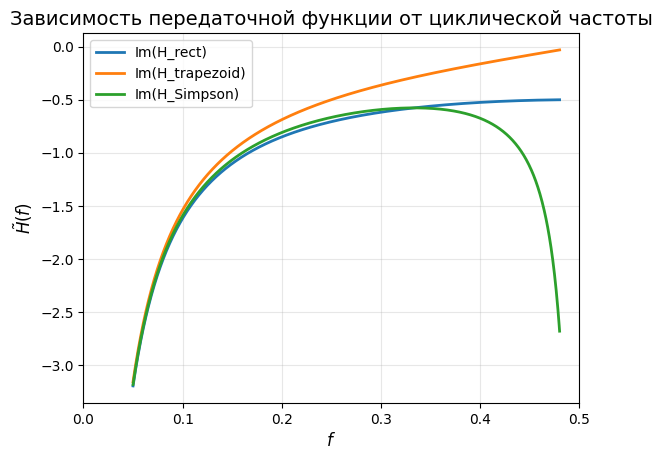

In [ ]:
f = np.linspace(0.05, 0.48, 1000)

H_functions = [Im_H_rect(f), Im_H_trapezoid(f), Im_H_Simpson(f)]
H_titles = ["Im(H_rect)", "Im(H_trapezoid)", "Im(H_Simpson)"]

func_plot(f, H_functions, H_titles, r"$\tilde{H}(f)$", "Зависимость передаточной функции от циклической частоты")

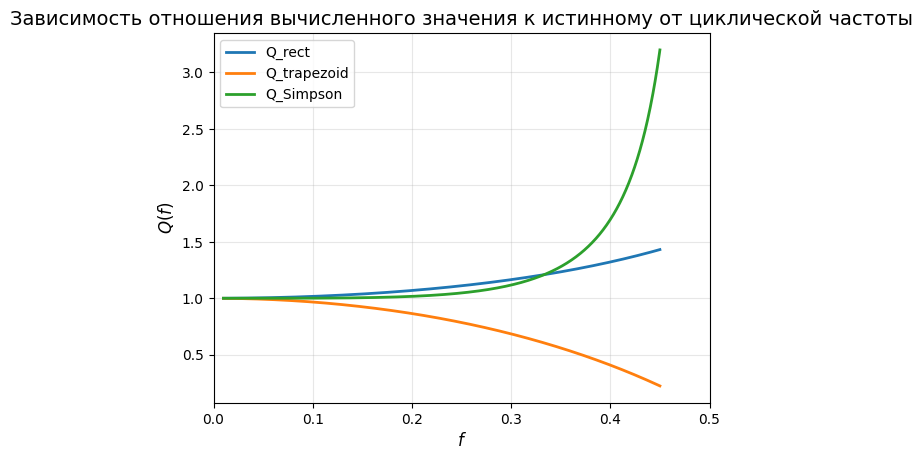

In [ ]:
f = np.linspace(0.01, 0.45, 1000)

Q_functions = [Q_rect(f), Q_trapezoid(f), Q_Simpson(f)]
Q_titles = ["Q_rect", "Q_trapezoid", "Q_Simpson"]

func_plot(f, Q_functions, Q_titles, r"$Q(f)$", "Зависимость отношения вычисленного значения к истинному от циклической частоты")

По АЧХ передаточных функций видно, что все фильтры инвертируют и усиливают низкие частоты. При этом в области высоких частот фильтры, основанные на методах трапеций и прямоугольников, подавляют сигнал, а фильтр на основе формулы Симпсона так же усиливает и инвертирует высокие частоты. При приближении циклической частоты к 0 передаточные функции всех трех фильтра приближаются к - бесконечности.

### Задание 2

**Метод 3/8**

Рекурсивный фильтр для интегрирования по правилу 3/8 строится по формуле $y_{n+2} = y_{n-1} + \frac{1}{8}(x_{n+2} + 3x_{n+1} + 3x_n + x_{n-1})$. Для гармонического сигнала $x_n = e^{i\omega n}$ выходной сигнал имеет вид $y_n = H(\omega) x_n$ Выразим передаточную функцию из уравнения:

$$H(\omega) e^{i\omega (n+2)} = H(\omega) e^{i\omega (n-1)} + \frac{1}{8}(e^{i\omega (n+2)} + 3e^{i\omega (n+1)} + 3e^{i\omega n} + e^{i\omega (n-1)})$$

$$H(\omega) = \frac{1}{8}\frac{e^{i\omega (n+2)} + 3e^{i\omega (n+1)} + 3e^{i\omega n} + e^{i\omega (n-1)}}{e^{i\omega (n+2)} - e^{i\omega (n-1)}} = \frac{1}{8}\frac{e^{2i\omega} + 3e^{i\omega} + 3 + e^{-i\omega}}{e^{2i\omega} - e^{-i\omega}}$$

Разделим числитель и знаменатель на $e^{i\omega /2}$ и получим:

$$H(\omega) = \frac{1}{8}\frac{e^{\frac{3}{2}i\omega } + 3e^{\frac{1}{2}i\omega} + 3e^{-\frac{1}{2}i\omega} + e^{-\frac{3}{2}i\omega}}{e^{\frac{3}{2}i\omega} - e^{-\frac{3}{2}i\omega}} = \frac{1}{8} \frac{\cos (3\omega /2) + 3\cos (\omega /2)}{i\sin (3\omega /2)}$$

Истинное значение интеграла $e^{i\omega n}$ равно $\frac{e^{i\omega n}}{i\omega}$. Найдем отношение численного значения к истинному:

$$Q(\omega) = i\omega\frac{\cos (3\omega /2) + 3\cos (\omega /2)}{8i\sin (3\omega /2)} = \omega\frac{\cos (3\omega /2) + 3\cos (\omega /2)}{8\sin (3\omega /2)} $$

In [ ]:
def Im_H_38(f):
  return - (np.cos(3 * np.pi * f) + 3 * np.cos(np.pi * f)) / (8 * np.sin(3 * np.pi * f))

def Q_38(f):
  return 2 * np.pi * f * (np.cos(3 * np.pi * f) + 3 * np.cos(np.pi * f)) / (8 * np.sin(3 * np.pi * f))

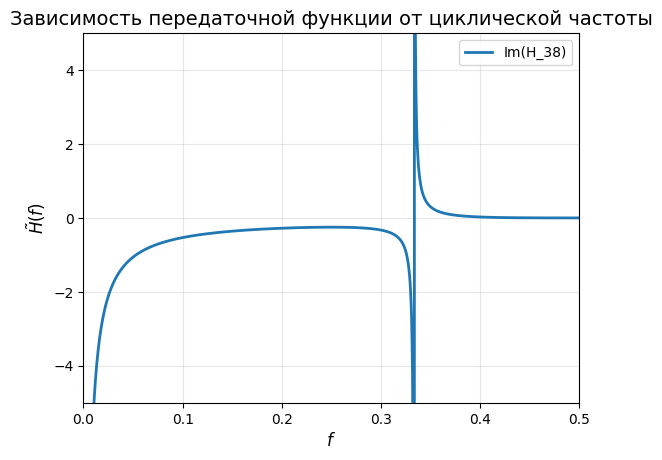

In [ ]:
f = np.linspace(0.01, 0.5, 1000)

func_plot(f, [Im_H_38(f)], ["Im(H_38)"], r"$\tilde{H}(f)$", "Зависимость передаточной функции от циклической частоты", ylim=(-5, 5))

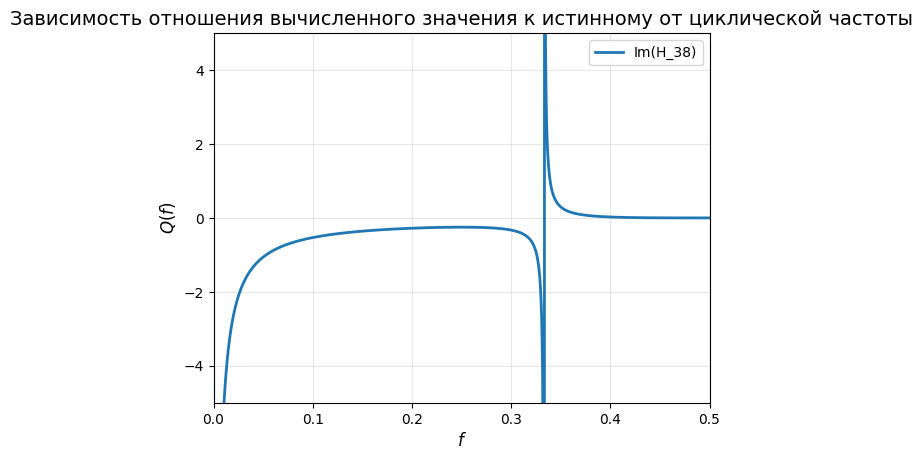

In [ ]:
func_plot(f, [Im_H_38(f)], ["Im(H_38)"], r"$Q(f)$", "Зависимость отношения вычисленного значения к истинному от циклической частоты", ylim=(-5, 5))

Графики передаточной функции и отношения вычисленного значения интеграла к истинному для метода 3/8 имеют вертикальные ассимптоты в точках $f = 0, f = 1/3$. Это говорит о том, что если исходный сигнал имеет составляющие с частотами, близкими к $f = k/3, k
\in ℕ $, то метод может дать некорректный результат. При других частотах график $Q(f)$ близок к горизонтальной оси, значит метод дает хорошую оценку интеграла сигнала.

## Выводы

 В ходе лабораторной работы были исследованы частотные характеристики различных квадратурных формул численного интегрирования — прямоугольников, трапеций, Симпсона и «правила 3/8». Для каждой формулы получены передаточные функции и построены соответствующие графики. Сравнение показало, что с увеличением порядка формулы повышается точность численного интегрирования по сравнению с аналитическим интегралом, особенно в области низких частот. Формулы Симпсона и «3/8» обеспечивают наилучшее приближение к истинному значению интеграла при малых частотах. Однако метод «3/8» проявляет неустойчивость при циклических частотах, близких к 0 и 1/3, что снижает его надежность в этих диапазонах. В целом, проведённый анализ подтвердил зависимость точности численного интегрирования от формы и порядка квадратурной формулы.